In [1]:
from __future__ import division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


# Load Dataset

In [2]:
from dataLoc import dataLoc
z_vals = [0.9, 1.0, 1.1]

dataList = []
for z_val in z_vals:
    fileName = dataLoc +"HiggsML_TES_{}.h5".format(z_val)
    print ("Loading file: ",fileName)

    data = pd.read_hdf(fileName, "data_syst")
    dataList.append(data)

Loading file:  /data1/users/aishik/systcovariant_data/HiggsML_TES_0.9.h5
Loading file:  /data1/users/aishik/systcovariant_data/HiggsML_TES_1.0.h5
Loading file:  /data1/users/aishik/systcovariant_data/HiggsML_TES_1.1.h5


In [3]:
for i in range(3):
    print(dataList[i].shape, (dataList[0].Weight).mean())

(618906, 32) 0.41412870938594465
(719349, 32) 0.41412870938594465
(818201, 32) 0.41412870938594465


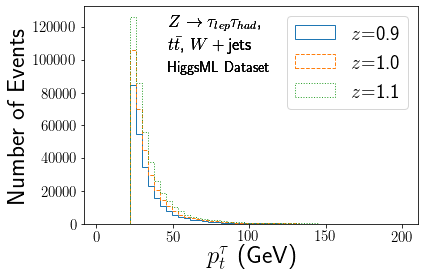

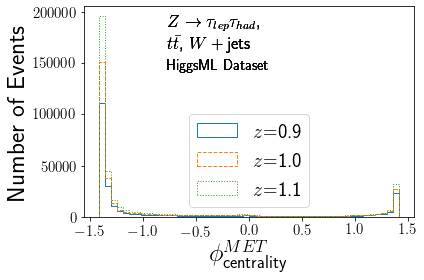

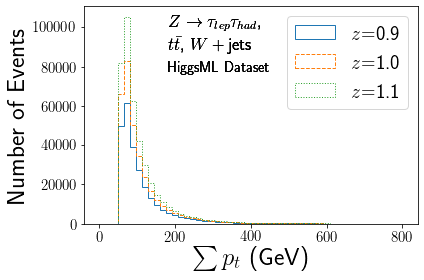

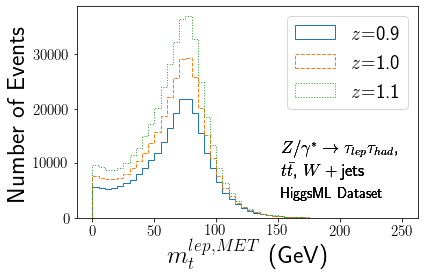

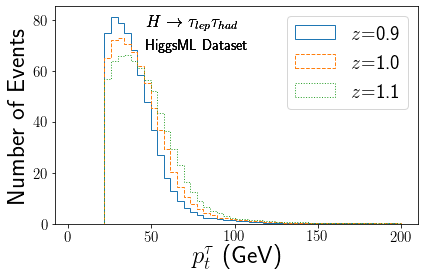

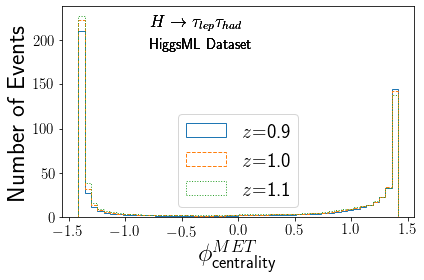

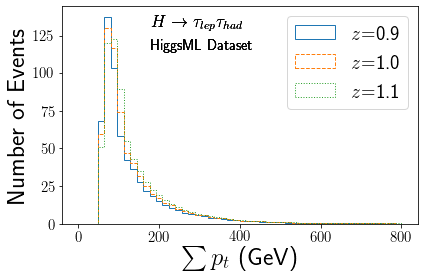

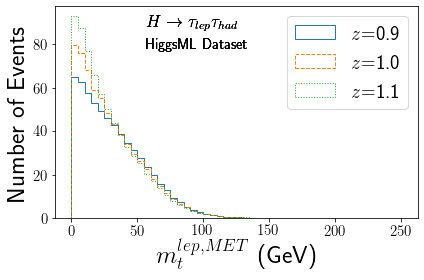

In [4]:
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rcParams.update({'figure.autolayout': True})
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
lss = ['solid', "dashed", "dotted"]

for cl in [0,1]:
    for featureName, xlab, rangee in zip(["PRI_tau_pt", "DER_met_phi_centrality", "DER_sum_pt", "DER_mass_transverse_met_lep"],
                                  [r"$p_t^\tau\text{ (GeV)}$", r"$\phi_{\text{centrality}}^{MET}$", r"$\sum p_t \text{ (GeV)} $",
                                   r"$m_t^{lep, MET} \text{ (GeV)}$"], [(2,200), None, (0, 800), (0,250)],):
        fig, ax = plt.subplots()
        for i in range (3):
            ax.hist(dataList[i].loc[dataList[i]["Label"]==cl, [featureName]].values, weights=dataList[i].loc[dataList[i]["Label"]==cl, ["Weight"]].values,  
                     histtype="step", linestyle=lss[i], range=rangee,  density=False, bins=50, 
                     label="$z$={}".format(z_vals[i]))
            if cl ==1:
                text_annot = r"$H \rightarrow \tau_{lep}\tau_{had}$"
                ax.text(x=0.25, y=0.9, s=text_annot, transform=ax.transAxes, size="xx-large")
                ax.text(x=0.25, y=0.8, s="HiggsML Dataset", transform=ax.transAxes, size="x-large")
                        
            else:
                if (featureName == "DER_mass_transverse_met_lep"):
                    ax.text(x=0.6, y=0.3, s=r"$Z/\gamma^* \rightarrow \tau_{lep}\tau_{had}$,", transform=ax.transAxes, size="xx-large")
                    ax.text(x=0.6, y=0.2, s=r"$t\bar{t}$, $W+\text{jets}$", transform=ax.transAxes, size="xx-large")
                    ax.text(x=0.6, y=0.1, s="HiggsML Dataset", transform=ax.transAxes, size="x-large")
                else:
                    ax.text(x=0.25, y=0.9, s=r"$Z \rightarrow \tau_{lep}\tau_{had}$,", transform=ax.transAxes, size="xx-large")
                    ax.text(x=0.25, y=0.8, s=r"$t\bar{t}$, $W+\text{jets}$", transform=ax.transAxes, size="xx-large")
                    ax.text(x=0.25, y=0.7, s="HiggsML Dataset", transform=ax.transAxes, size="x-large")
            
        ax.set_xlabel(xlab)
        ax.set_ylabel("Number of Events")
        if (featureName == "DER_met_phi_centrality"):
            ax.legend(loc="lower center")
        else:
            ax.legend()
        #plt.savefig("plots/exploreDataset/{}_class{}.pdf".format(featureName, cl))
        plt.show()
        plt.close()